# Data Visualisation
***
### Applied Computational Intelligence

Apart from looking analysing data with basic statistics, we can also visualise data using graphs to obtain a better understanding.
<br/><br/>
## Data preparation

First, we will prepare the data like we have done in the previous module. 
- Remove null values
- Add a label for Quota

In [227]:
import pandas as pd 


df_sales = pd.read_csv("icecream.csv", delimiter=",", header="infer")
df_sales = df_sales.dropna(axis=0 ,how = "any")
quota = pd.Series(df_sales.Sales>=70)
df_sales = pd.concat([df_sales, quota.rename("QuotaMet")], axis=1)
df_sales

,Date,Temperature,Sales,BreakDown,Area,QuotaMet
0,02/08/2021,40.0,72.0,No,A1,True
1,03/08/2021,35.0,68.0,No,A2,False
2,04/08/2021,35.0,68.0,No,A2,False
3,05/08/2021,32.0,64.0,No,A3,False
4,06/08/2021,31.0,64.0,No,A1,False
5,07/08/2021,30.0,62.0,No,A1,False
6,08/08/2021,29.0,62.0,No,A1,False
7,09/08/2021,28.0,60.0,Yes,A3,False
8,10/08/2021,30.0,64.0,No,A2,False
9,11/08/2021,33.0,66.0,No,A2,False


## Visualising with Matplotlib

Let's start with a simple bar chart that shows the grade of each student against their name.

__Note__ : `matplotlib` library is required

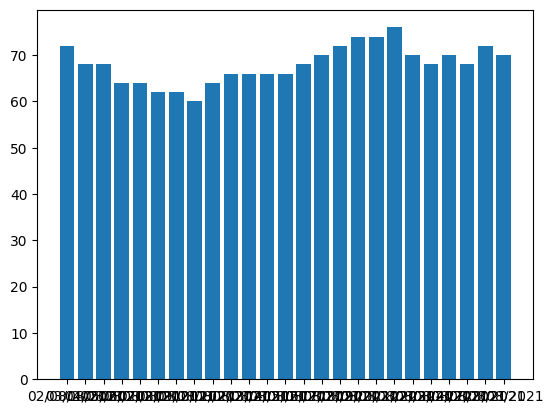

In [228]:
#in order to include charts in a Jupyter notebook, following is needed
%matplotlib inline
from matplotlib import pyplot as plt

plt.bar(x=df_sales.Date, height=df_sales.Sales)
plt.show()


That displayed the results but it requires several improvements. For example:
<table>
<tr>
    <th>Improvement</th>
    <th>Purpose</th>
</tr>
<tr>
    <td>Bar Chart Colour</td>
    <td>Colours can be customsied, it there is only one range it won't make much difference. But, if there are multiple ranges, it's best to choose suitable colours.</td>
</tr>
<tr>
    <td>Chart Title</td>
    <td>It's import to annotate charts to show what they are showing. In this case the chart title should show an overall of what it is showing.</td>
</tr>
<tr>
    <td>Axis Label</td>
    <td>Every axis should be labelled to clearly identify the range it is representing.</td>
</tr>
<tr>
    <td>Grid Lines</td>
    <td>Sometimes, grid lines can be used to make it easier to read values off the chart.</td>
</tr>
<tr>
    <td>Markers Rotation</td>
    <td>Sometimes axis labels are difficult to read especially if they overlap each other. So, rotating them will make them easier to read.</td>
</tr>
</table>

<function matplotlib.pyplot.show(close=None, block=None)>

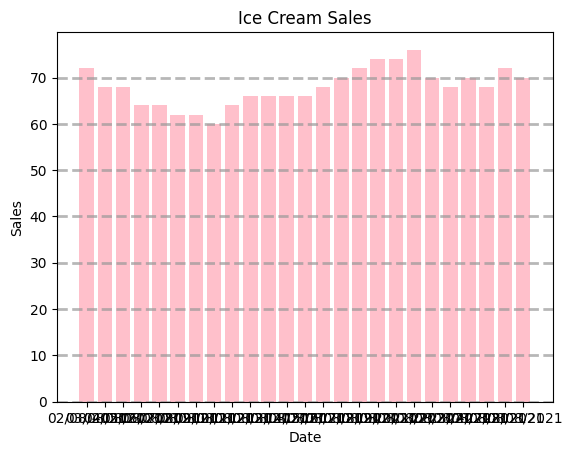

In [229]:
plt.bar(x=df_sales.Date, height=df_sales.Sales, color='pink')

plt.title("Ice Cream Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(color='#999999', linestyle = "--", linewidth=2, axis="y", alpha = 0.7)
plt.show


Ideally when plotting time-series data, we use a continuous line chart rather than a bar plot.

<function matplotlib.pyplot.show(close=None, block=None)>

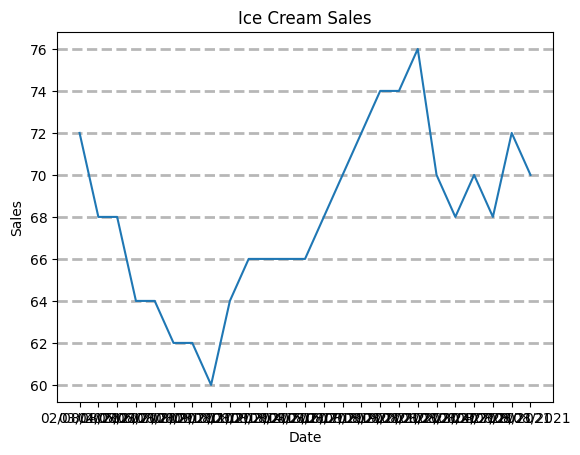

In [230]:
plt.plot(df_sales.Date, df_sales.Sales)

plt.title("Ice Cream Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(color='#999999', linestyle = "--", linewidth=2, axis="y", alpha = 0.7)
plt.show


For now, we will still use the bar chart.

A `plot` is contained within a `Figure`, which when not specified is generated automatically. However, a `Figure` can be created explicitly before plotting.

<function matplotlib.pyplot.show(close=None, block=None)>

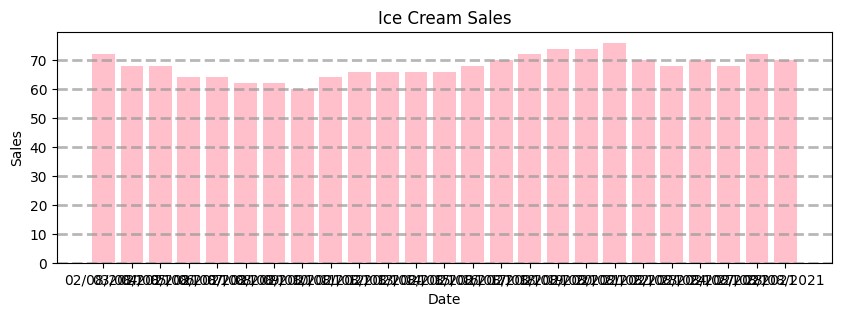

In [231]:
fig = plt.figure(figsize=(10,3))

plt.bar(x=df_sales.Date, height=df_sales.Sales, color='pink')

plt.title("Ice Cream Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(color='#999999', linestyle = "--", linewidth=2, axis="y", alpha = 0.7)
plt.show




A figure can contain multiple plots, each with its own axis.

For example the following will create two subplots __[more information on subplots](https://matplotlib.org/stable/api/figure_api.html?highlight=subplots#matplotlib.figure.Figure.subplots)__.

Text(0.5, 0.98, 'Ice Cream Data')

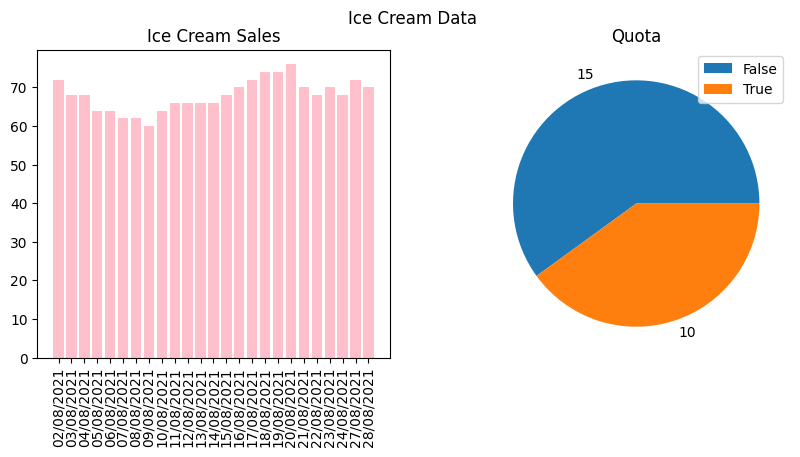

In [232]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(x=df_sales.Date, height=df_sales.Sales, color='pink')

ax[0].set_title("Ice Cream Sales")
ax[0].set_xticks(df_sales.Date)
ax[0].set_xticklabels(df_sales.Date, rotation=90)

quota_counts = df_sales["QuotaMet"].value_counts()

ax[1].pie(quota_counts, labels = quota_counts)
ax[1].set_title("Quota")
ax[1].legend(quota_counts.keys().tolist())

fig.suptitle("Ice Cream Data")


Several libraries (including `Pandas`) offer wrappers for `Matplotlib` for plotting data directly from a DataFrame. 

<Axes: xlabel='Date'>

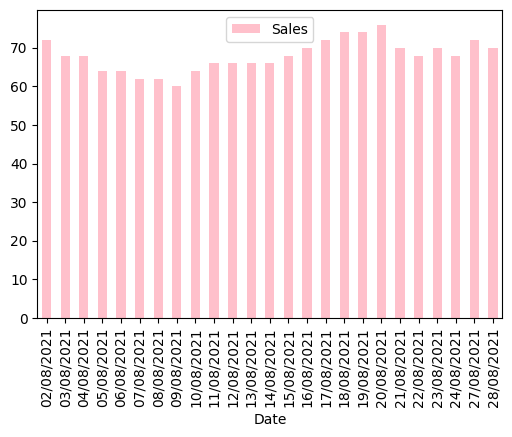

In [233]:
df_sales.plot.bar(x = "Date", y = "Sales", color = "pink", figsize=(6,4))

## Getting started with statistical analysis

After initial data exploration, one can obtain more information about the data using some basic statistical techniques.

### Descriptive Statistics

One important aspect for data scientists is data distribution which shows how data is spread over the sample. Usually, the starting point is a histogram.

Text(0, 0.5, 'Frequency')

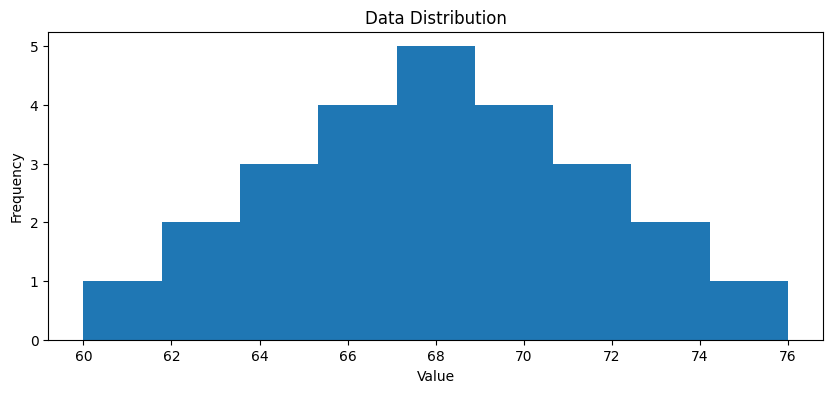

In [234]:
var_data = df_sales["Sales"]

fig = plt.figure(figsize=(10,4))
plt.hist(var_data, bins = 9)

plt.title("Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

In certain cases the histogram might contain empty areas like this spot. We can rectify this by specifying the number of bins (groups).

In [235]:
var = df_sales.Sales

min_val = var.min()
max_val = var.max()
mean_val = var.mean()
median_val = var.median()
mode_val = var.mode()[0]

print("min:", min_val)
print("max:",max_val)
print("mean:",mean_val)
print("median:",median_val)
print("mode:",mode_val)

min: 60.0
max: 76.0
mean: 68.0
median: 68.0
mode: 68.0


Describe function


In [236]:
var.describe()

count    25.000000
mean     68.000000
std       4.082483
min      60.000000
25%      66.000000
50%      68.000000
75%      70.000000
max      76.000000
Name: Sales, dtype: float64

boxplot


As one can see the sales distribution is symmetric with most sales occuring in the 65 to 71 zone.

### Measures of centeral tendency

To understand the distribution better, we can examing measures of central tendency. The aim is to find the typical value. Usually, this is done by:

<table>
    <tr>
        <th>Measure</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>Mean</td>
        <td>Obtained by totalling all the numbers and then dividing the this total by the total number of elements.</td>
    </tr>
    <tr>
        <td>Median</td>
        <td>Obtained by sorting the numbers, then extracting the middle one.</td>
    </tr>
    <tr>
        <td>Mode</td>
        <td>Obtained by counting the occurence of each number, and choosing the one with the highest count of occurences.</td>
    </tr>
</table>

Text(0, 0.5, 'Frequency')

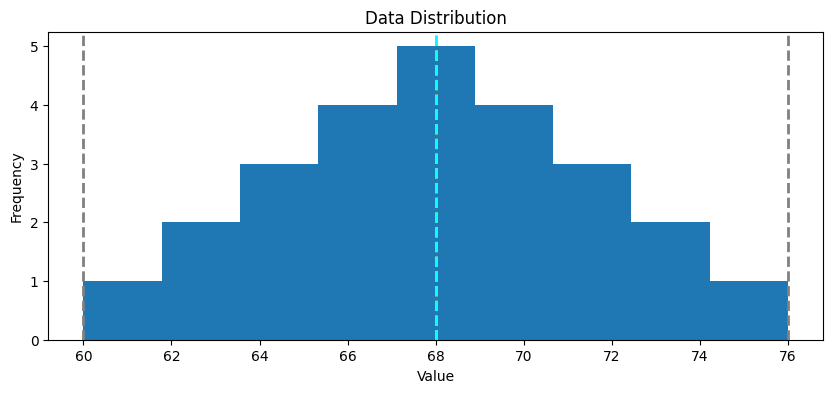

In [237]:
fig = plt.figure(figsize=(10,4))

plt.hist(var_data, bins = 9)

plt.axvline(x = min_val, color = "gray", linestyle ="dashed", linewidth = 2)
plt.axvline(x = max_val, color = "gray", linestyle ="dashed", linewidth = 2)
plt.axvline(x = mean_val, color = "red", linestyle ="dashed", linewidth = 2)
plt.axvline(x = median_val, color = "yellow", linestyle ="dashed", linewidth = 2)
plt.axvline(x = mode_val, color = "cyan", linestyle ="dashed", linewidth = 2)
plt.title("Data Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Data Distibution')

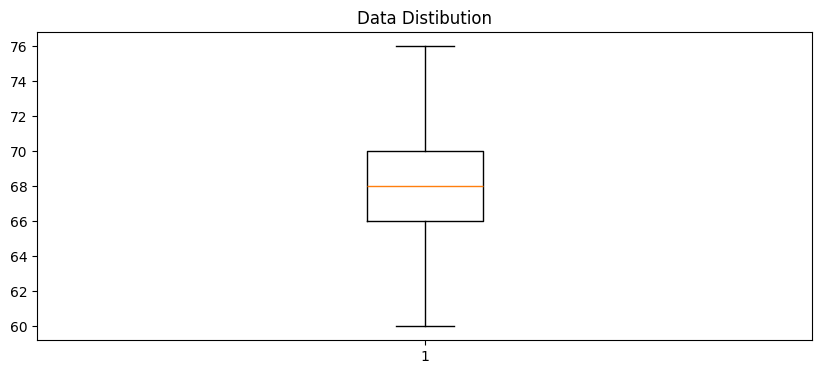

In [238]:
var - df_sales.Sales

fig = plt.figure(figsize=(10,4))

plt.boxplot(var)

plt.title("Data Distibution")

As one can see, the mean, median, and mode are all equal. 

Sometimes, a box-and-whiskers plot is used to obtain more insights into the data.


This shows the inner two quartiles (surrounded by a box), in this case half of the sales are between 66 and 70. The whiskers extending from the box show the other two quartiles. So, in this case the other half of the grades is between 60 and 65, or 71 to 76. The line in the box shows the median.

We can combine both charts to be displayed underneath each other. Let's create a function for re-usability.

min: 60.0
max: 76.0
mean: 68.0
median: 68.0
mode: 68.0


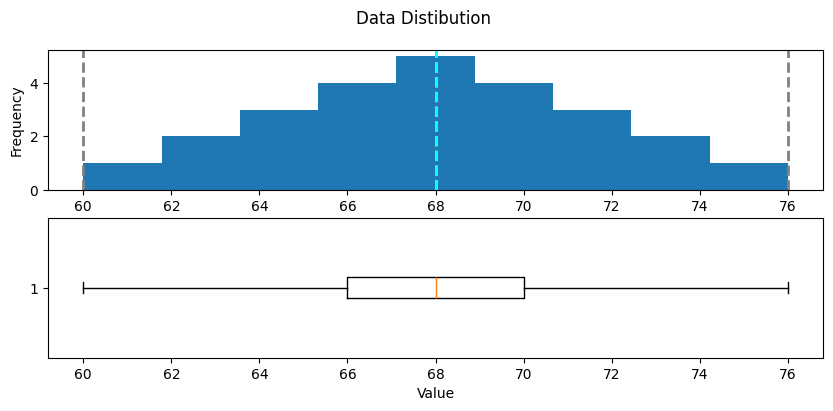

In [239]:
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    min_val = var.min()
    max_val = var.max()
    mean_val = var.mean()
    median_val = var.median()
    mode_val = var.mode()[0]

    print("min:", min_val)
    print("max:",max_val)
    print("mean:",mean_val)
    print("median:",median_val)
    print("mode:",mode_val)

    fig, ax = plt.subplots(2, 1, figsize=(10,4))

    ax[0].hist(var_data, bins = 9)
    ax[0].set_ylabel("Frequency")
    ax[0].axvline(x = min_val, color = "gray", linestyle ="dashed", linewidth = 2)
    ax[0].axvline(x = max_val, color = "gray", linestyle ="dashed", linewidth = 2)
    ax[0].axvline(x = mean_val, color = "red", linestyle ="dashed", linewidth = 2)
    ax[0].axvline(x = median_val, color = "yellow", linestyle ="dashed", linewidth = 2)
    ax[0].axvline(x = mode_val, color = "cyan", linestyle ="dashed", linewidth = 2)


    ax[1].boxplot(var_data, vert = False)
    ax[1].set_xlabel("Value")
    fig.suptitle("Data Distibution")




show_distribution(df_sales.Sales)





This shows that the data has most of the values in the middle, and they decline towards each of the extremes.

In statistics,  most of the time a sample is analysed, and this sample is used to extrapolate to the entire population. Samples are used, because it's almost impossible to obtain data about the entire population. 

If we have enough samples we can calculate something called a probability density function which estimates the distribution for the entire population.

ModuleNotFoundError: No module named 'scipy'

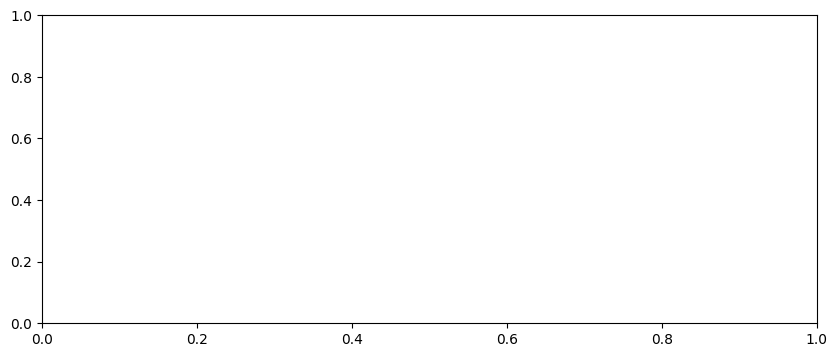

In [240]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))
    var_data.plot.density()
    plt.title("Data Density")

    plt.axvline(x = var_data.median(), color = "red", linestyle ="dashed", linewidth = 2)
    plt.axvline(x = var_data.mode()[0], color = "yellow", linestyle ="dashed", linewidth = 2)
    plt.axvline(x = var_data.mean(), color = "cyan", linestyle ="dashed", linewidth = 2)

    plt.show()
    



show_density(df_sales.Sales)

This shows that the data has a normal distribution (bell curve), which means that the mean, and mode are at the centre, and the tails are symmetric.